# Estimation of Obesity Levels Based On Eating Habits and Physical Condition


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
# Note, for now MinMaxScaler > normalize > StandardScaler > MaxAbsScaler (but not by much)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import math

### Load dataset

In [27]:
dataset = pd.read_csv('dataset/obesity_dataset.csv')
dataset


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [28]:
## Check for missing values
print(dataset.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


### Define the attributes to include in the Histograms

In [29]:
columns_to_plot = {
    # 'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height (m)',
    'Weight': 'Weight (kg)',
    'family_history_with_overweight': 'family_history_with_overweight',
    'FAVC': 'FAVC (Frequently high caloric food)',
    # 'FCVC': 'FCVC (Vegetables in your meals)',
    # 'NCP': 'NCP (Amount of daily main meals)',
    # 'CAEC': 'CAEC (Eating food between meals)',
    # 'SMOKE': 'SMOKE',
    # 'CH2O': 'CH2O (Daily water intake (L))',
    'SCC': 'SCC (Monitoring of daily calory intake)',
    'CALC': 'CALC (Alcohol consumption)',
    'FAF': 'FAF (Days a week with physical activity)',
    # 'TUE': 'TUE (Daily time spent using electronic devices)',
    'MTRANS': 'MTRANS (usually used transportation)',
    'NObeyesdad': 'NObeyesdad (Obesity level)'
}

### Generate Histograms

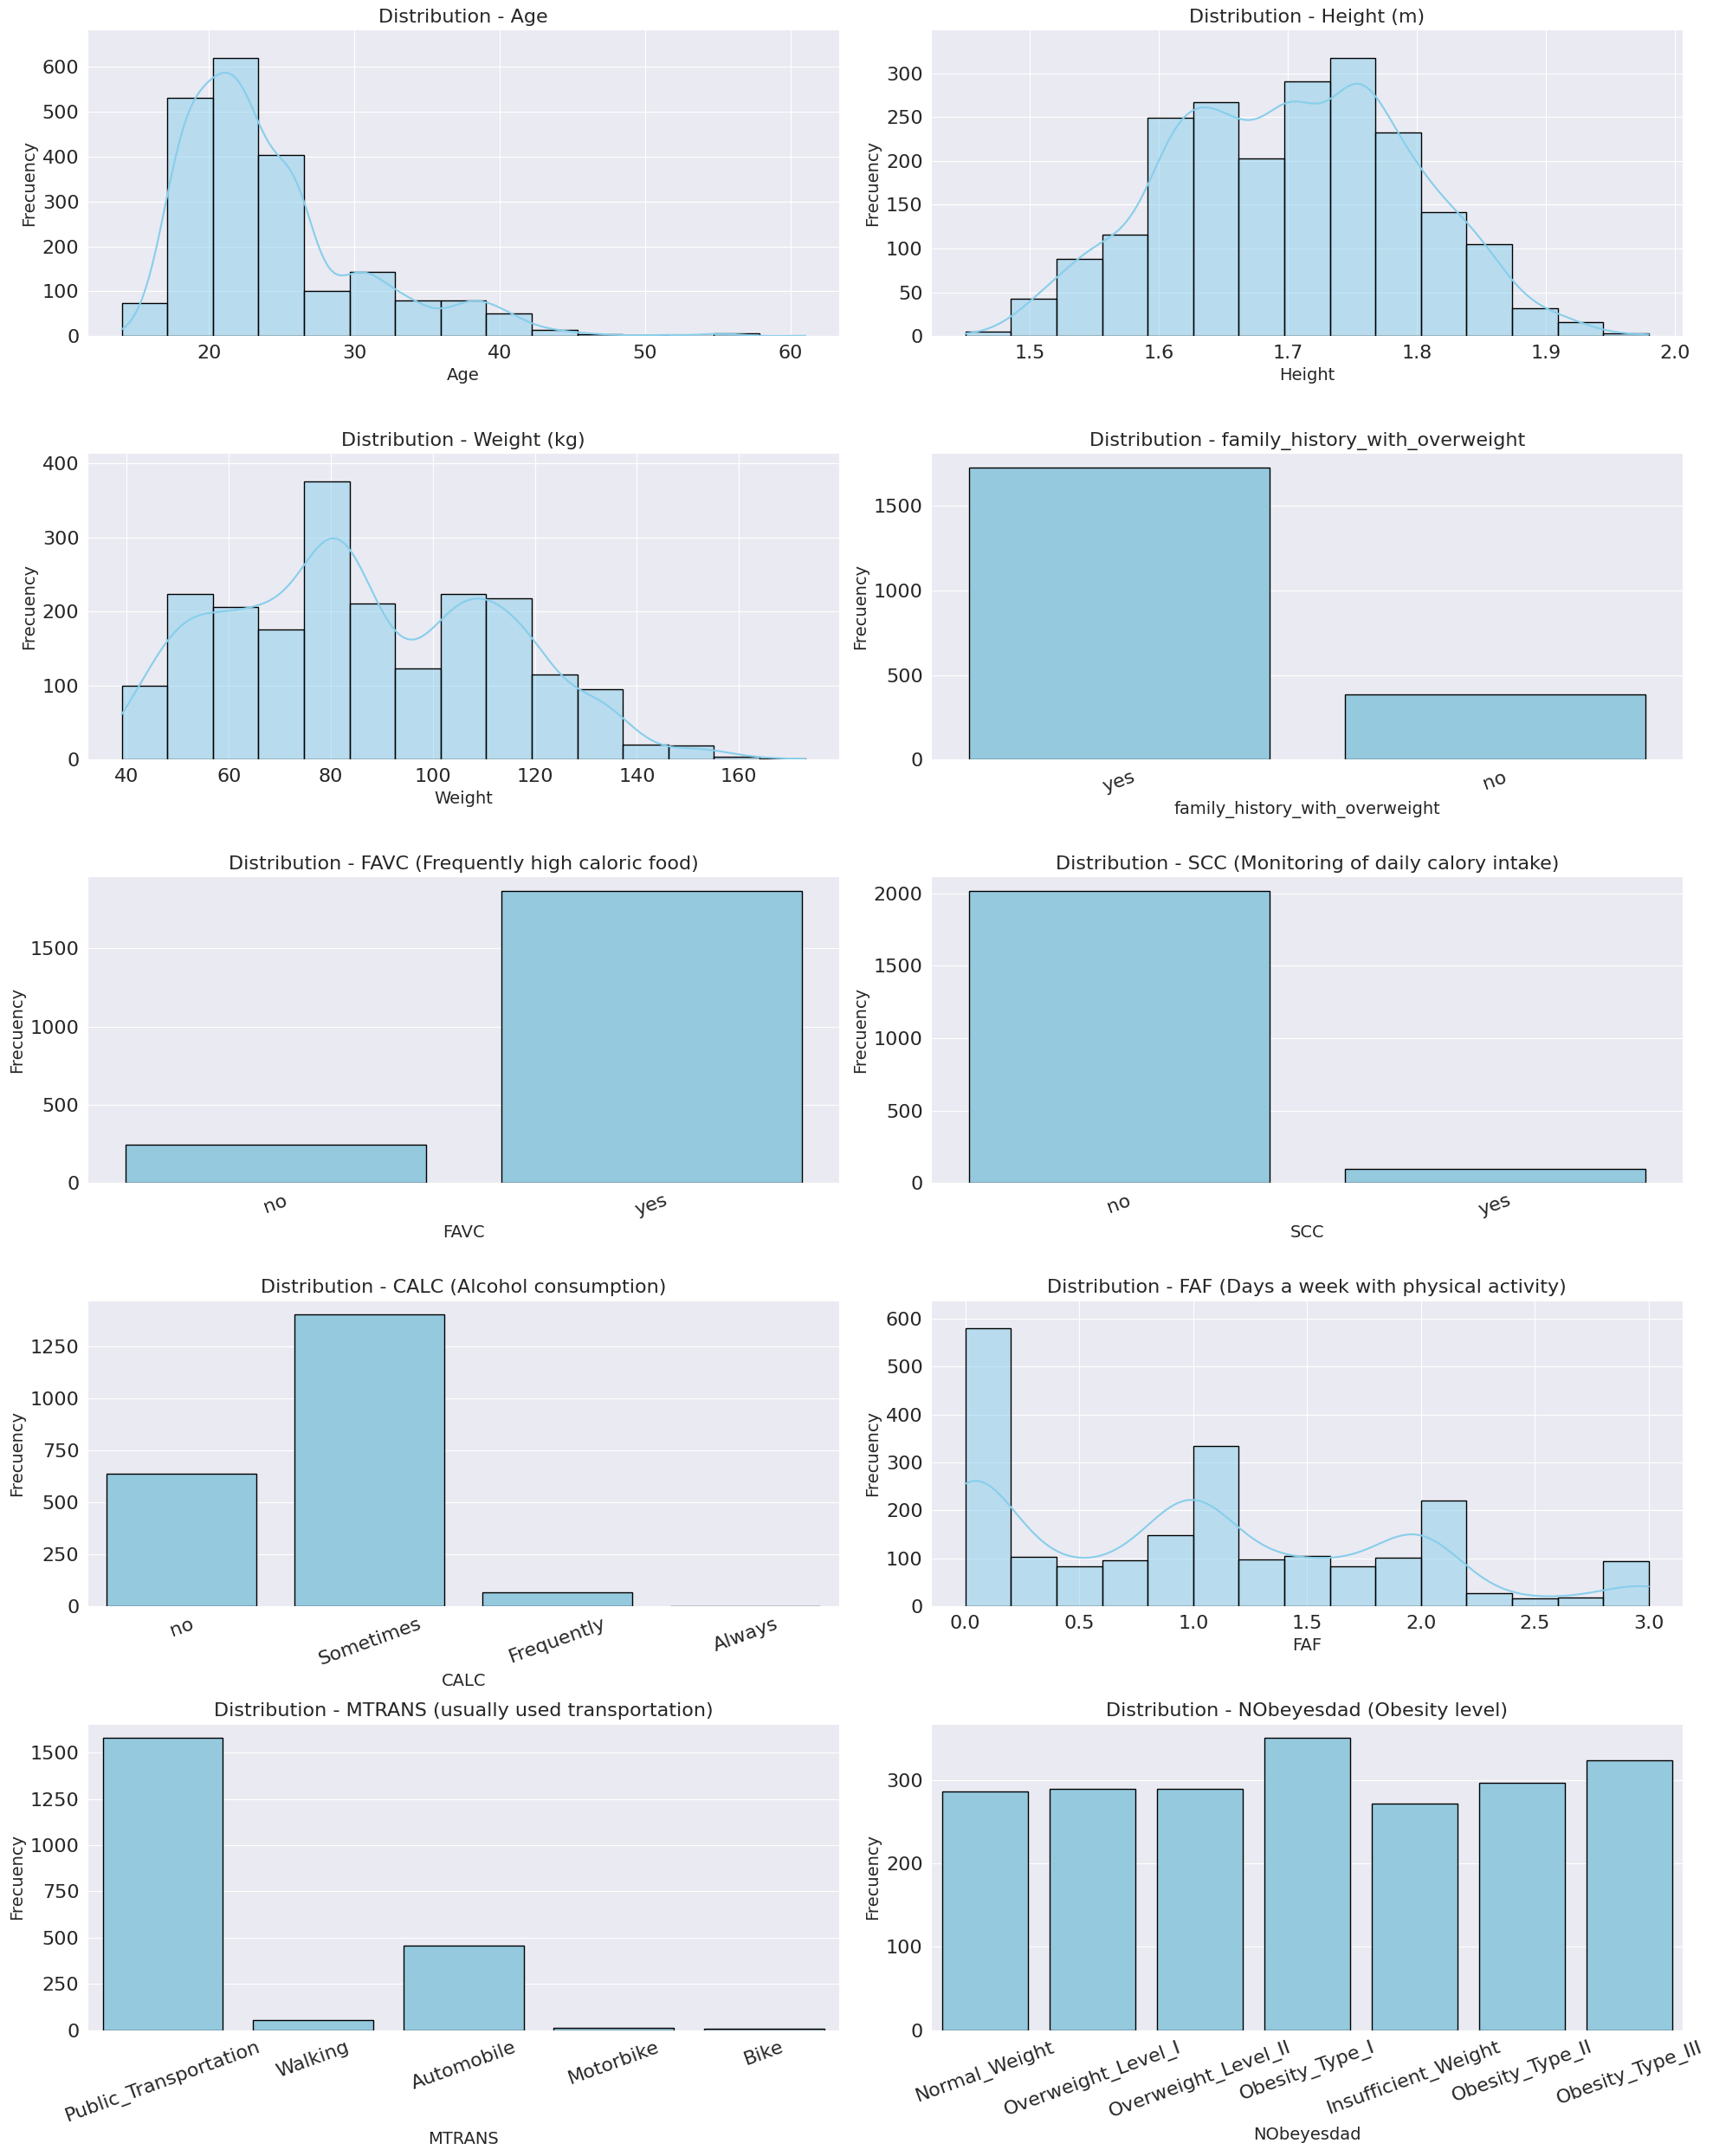

In [30]:
charts_per_row = 2
total_columns = len(columns_to_plot)
rows = math.ceil(total_columns / charts_per_row)

fig, axs = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))

axs = axs.ravel()

for i, column in enumerate(columns_to_plot):
    if pd.api.types.is_numeric_dtype(dataset[column]):
        sns.histplot(dataset[column], kde=True, ax=axs[i], color='skyblue', edgecolor='black', bins=15)
        max_count = max(np.histogram(dataset[column].dropna(), bins=15)[0])
        axs[i].set_ylim(top=max_count * 1.1) 
    else:
        sns.countplot(data=dataset, x=column, ax=axs[i], color='skyblue', edgecolor='black')
        axs[i].tick_params(axis='x', rotation=20)
    
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].set_title(f'Distribution - {columns_to_plot[column]}', fontsize=16)
    axs[i].set_xlabel(column, fontsize=14)
    axs[i].set_ylabel('Frecuency', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig('obesity_histogram.png', dpi=fig.dpi)


## Processing

In [33]:
from sklearn.preprocessing import LabelEncoder

dataset_encoded = dataset.copy()
le = LabelEncoder()

# Apply LabelEncoder to each string column
for col in dataset_encoded.select_dtypes(include='object').columns:
    dataset_encoded[col] = le.fit_transform(dataset_encoded[col])
    
dataset_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [34]:
X = dataset_encoded.drop('NObeyesdad', axis=1)
y = dataset_encoded['NObeyesdad']

## Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
# For MinMaxScaler, MaxAbsScaler and StandardScaler
## Scale the data (standardize)
scaler = MinMaxScaler()


# Fit the scaler to the dataset and transform the dataset
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data, based on the scaler fitted to the training data
X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test)


# ## For normalization
# # Fit the scaler to the dataset and transform the dataset
# X_attributes_scaled = X_attributes_test.copy()
# X_attributes_scaled = normalize(X_attributes, norm='l2')

# # Scale the test data, based on the scaler fitted to the training data
# X_attributes_test_scaled = X_attributes_test.copy()
# X_attributes_test_scaled = normalize(X_attributes_test, norm='l2')

In [37]:
X_train_scaled

array([[0.        , 0.31867643, 0.47169811, ..., 0.5       , 0.33333333,
        0.        ],
       [0.        , 0.45600126, 0.40222264, ..., 0.764357  , 1.        ,
        0.        ],
       [1.        , 0.24806579, 0.75173585, ..., 0.0132875 , 0.66666667,
        0.75      ],
       ...,
       [0.        , 0.19127332, 0.37735849, ..., 1.        , 1.        ,
        0.75      ],
       [0.        , 0.19148936, 0.33616604, ..., 0.315433  , 1.        ,
        0.75      ],
       [1.        , 0.12765957, 0.69335849, ..., 0.280801  , 0.66666667,
        0.75      ]])

In [38]:
# Train a Random Forest model to get which Features are more important
model = RandomForestClassifier(max_leaf_nodes=2,
                        max_features=5,
                        max_depth=5,
                        random_state=42)

# Fit the model to the data
model.fit(X_train, y_train)

# Get the most important Features
most_important_attributes = pd.DataFrame(
                            model.feature_importances_,
                            index = X_train.columns,
                            columns=['importance']
                        ).sort_values('importance', ascending=False)

print(most_important_attributes)


## Get a list of the most important Features whose importance is greater than 0.05
most_important_attributes_list_importance_5_percent = most_important_attributes[most_important_attributes['importance'] > 0.05].index.tolist()
most_important_attributes_list_importance_10_percent = most_important_attributes[most_important_attributes['importance'] > 0.1].index.tolist()

print(most_important_attributes_list_importance_5_percent)
print(most_important_attributes_list_importance_10_percent)

                                importance
Weight                                0.32
FCVC                                  0.25
Gender                                0.13
family_history_with_overweight        0.13
Age                                   0.08
Height                                0.02
NCP                                   0.02
CAEC                                  0.02
FAF                                   0.01
TUE                                   0.01
CALC                                  0.01
FAVC                                  0.00
SMOKE                                 0.00
CH2O                                  0.00
SCC                                   0.00
MTRANS                                0.00
['Weight', 'FCVC', 'Gender', 'family_history_with_overweight', 'Age']
['Weight', 'FCVC', 'Gender', 'family_history_with_overweight']


In [39]:
# Select only the attributes whose importance is greater than 5%
X_train_important_attributes_5p = X_train.copy()
X_train_important_attributes_5p = X_train[most_important_attributes_list_importance_5_percent]

X_test_important_attributes_5p = X_test.copy()
X_test_important_attributes_5p = X_test[most_important_attributes_list_importance_5_percent]

# Select only the attributes whose importance is greater than 10%
X_train_important_attributes_10p = X_train.copy()
X_train_important_attributes_10p = X_train[most_important_attributes_list_importance_10_percent]

X_test_important_attributes_10p = X_test.copy()
X_test_important_attributes_10p = X_test[most_important_attributes_list_importance_10_percent]


# Select only the attributes whose importance is greater than 5% from the scaled data
X_train_scaled_important_attributes_5p = X_train_scaled.copy()
X_test_scaled_important_attributes_5p = X_test_scaled.copy()

X_train_scaled_important_attributes_5p = pd.DataFrame(X_train_scaled_important_attributes_5p, columns=X_train.columns)
X_test_scaled_important_attributes_5p = pd.DataFrame(X_test_scaled_important_attributes_5p, columns=X_test.columns)

X_train_scaled_important_attributes_5p = X_train_scaled_important_attributes_5p[most_important_attributes_list_importance_5_percent]
X_test_scaled_important_attributes_5p = X_test_scaled_important_attributes_5p[most_important_attributes_list_importance_5_percent]


# Select only the attributes whose importance is greater than 10% from the scaled data
X_train_scaled_important_attributes_10p = X_train_scaled.copy()
X_test_scaled_important_attributes_10p = X_test_scaled.copy()

X_train_scaled_important_attributes_10p = pd.DataFrame(X_train_scaled_important_attributes_10p, columns=X_train.columns)
X_test_scaled_important_attributes_10p = pd.DataFrame(X_test_scaled_important_attributes_10p, columns=X_test.columns)

X_train_scaled_important_attributes_10p = X_train_scaled_important_attributes_10p[most_important_attributes_list_importance_10_percent]
X_test_scaled_important_attributes_10p = X_test_scaled_important_attributes_10p[most_important_attributes_list_importance_10_percent]

## Models training and evaluation

In [40]:
## Summary of the variables with the data
# X_train - Attributes of the training data, without the class column
# y_train - Class of the training data

# X_test - Attributes of the test data, without the class column
# y_test - Class of the test data

# X_train_scaled - Attributes of the training data, without the class column, scaled
# X_test_scaled - Attributes of the test data, without the class column, scaled

# X_train_important_attributes_5p - Attributes of the training data, without the class column, with only the most important Features
# X_test_important_attributes_5p - Attributes of the test data, without the class column, with only the most important Features

# X_train_scaled_important_attributes_5p - Attributes of the training data, without the class column, with only the most important Features, scaled
# X_test_scaled_important_attributes_5p - Attributes of the test data, without the class column, with only the most important Features, scaled

In [41]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Validating the model
    Y_predicted = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, Y_predicted)
    f1 = f1_score(y_test, Y_predicted, average='weighted')
    report = classification_report(y_test, Y_predicted, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']

    # Return metrics
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

## 1. KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [43]:
training_classes = y_train
validation_classes = y_test

### Test 1
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: All

In [44]:
k = 10
weights = 'distance'
training_attributes = X_train
validation_data = X_test

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Train and validate the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.8541666666666666,
 'precision': 0.8446968067398009,
 'recall': 0.8527868208208572,
 'f1_score': 0.8461829921868301}

### Test 2
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: All

In [45]:
k = 10
weights = 'distance'

training_attributes = X_train_scaled
validation_data = X_test_scaled

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)

{'accuracy': 0.7481060606060606,
 'precision': 0.7393152145298977,
 'recall': 0.7474539567112116,
 'f1_score': 0.7293055182195369}

### Test 3
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [46]:
k = 10
weights = 'uniform'

training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.7803030303030303,
 'precision': 0.7688991406588304,
 'recall': 0.7755827282708562,
 'f1_score': 0.7712033606064269}

### Test 4
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [47]:
k = 10
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7954545454545454,
 'precision': 0.7906591653791042,
 'recall': 0.789359051798277,
 'f1_score': 0.7945162873627766}

### Test 5
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [48]:
k = 10
weights = 'uniform'

training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)


# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7916666666666666,
 'precision': 0.7855879327676087,
 'recall': 0.7891273713519101,
 'f1_score': 0.7853376247409922}

### Test 6
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [49]:
k = 10
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7708333333333334,
 'precision': 0.7619925662572722,
 'recall': 0.762319468255494,
 'f1_score': 0.7674542613301788}

### ---- Finding the best K ----

In [50]:
# Finding the best K value
# Creating a list of K values in the range of 1 to 20
def optimal_k(X_train):
    k_values = list(range(1, 100))

    # Creating a list of cross validation scores
    cv_scores = []

    for k in k_values:
        # Creating the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        
        # Doing cross validation
        scores = cross_val_score(knn_model, X_train, y_train, cv=12, scoring='accuracy')
        
        # Saving the mean of the scores
        cv_scores.append(np.mean(scores))

    # Finding the optimal K value by finding the one with the highest accuracy
    optimal_k = k_values[np.argmax(cv_scores)]
    print(f"The optimal number of neighbors is: {optimal_k}")
    return optimal_k

### Test 6
- `Neighbors`: 5
- `Weights`: uniform
- `Data normalization`: No
- `Features`: All

In [51]:
print(optimal_k(X_train))

The optimal number of neighbors is: 1
1


In [52]:
k = 5
weights = 'distance'

training_attributes = X_train
validation_data = X_test

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.8768939393939394,
 'precision': 0.8738900781768754,
 'recall': 0.8768161677739797,
 'f1_score': 0.8669102638689481}

### Test 7
- `Neighbors`: 19
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: All

In [53]:
print(optimal_k(X_train_scaled))

The optimal number of neighbors is: 1
1


In [54]:
k = 19
weights = 'distance'

training_attributes = X_train_scaled
validation_data = X_test_scaled

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7253787878787878,
 'precision': 0.7205711279782573,
 'recall': 0.7241940040436996,
 'f1_score': 0.7071980784903552}

### Test 8
- `Neighbors`: 5
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterWorst
    - concavityWorst
    - perimeterMean

In [55]:
print(optimal_k(X_train_important_attributes_5p))

The optimal number of neighbors is: 1
1


In [56]:
k = 5
weights = 'uniform'

training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.8106060606060606,
 'precision': 0.8025798212628895,
 'recall': 0.8067029854748659,
 'f1_score': 0.8027217342486634}

### Test 9
- `Neighbors`: 6
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [57]:
print(optimal_k(X_train_scaled_important_attributes_5p))

The optimal number of neighbors is: 1
1


In [58]:
k = 18
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7329545454545454,
 'precision': 0.7231157523551968,
 'recall': 0.7267420267181882,
 'f1_score': 0.7305281101637923}

### Test 10
- `Neighbors`: 9
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [59]:
print(optimal_k(X_train_important_attributes_10p))

The optimal number of neighbors is: 3
3


In [60]:
k = 9
weights = 'uniform'

training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7821969696969697,
 'precision': 0.7790941548671556,
 'recall': 0.7790691549416575,
 'f1_score': 0.7747077615434796}

### Test 11
- `Neighbors`: 9
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [61]:
print(optimal_k(X_train_scaled_important_attributes_10p))

The optimal number of neighbors is: 3
3


In [62]:
k = 3
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7746212121212122,
 'precision': 0.7711094027517845,
 'recall': 0.76873510803822,
 'f1_score': 0.7732659169188628}

## Neural Networks

### Test 1
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: All

In [63]:
training_attributes = X_train
validation_data = X_test

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)




{'accuracy': 0.875,
 'precision': 0.8706523285539027,
 'recall': 0.8743797206764496,
 'f1_score': 0.869035572130468}

### Test 2
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: All

In [64]:
training_attributes = X_train_scaled
validation_data = X_test_scaled

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)





{'accuracy': 0.7708333333333334,
 'precision': 0.7659455401291716,
 'recall': 0.7676396362633778,
 'f1_score': 0.7612334627146197}

### Test 3
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [65]:
training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)





{'accuracy': 0.8257575757575758,
 'precision': 0.8181303280107158,
 'recall': 0.8229404387097732,
 'f1_score': 0.8204386732514326}

### Test 4
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [66]:
training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)




{'accuracy': 0.8162878787878788,
 'precision': 0.8093861021460277,
 'recall': 0.8131669751889284,
 'f1_score': 0.8147651089250733}

### Test 5
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [67]:
training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p

hidden_layers_structure = (5, 3)

neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)





{'accuracy': 0.7859848484848485,
 'precision': 0.7811876457606545,
 'recall': 0.7832869615577881,
 'f1_score': 0.7848746625296981}

### Test 6
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [68]:
training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.7746212121212122,
 'precision': 0.7711094027517845,
 'recall': 0.76873510803822,
 'f1_score': 0.7732659169188628}

### Test 7
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `solver`: sgd
- `Features`: All

In [69]:
training_attributes = X_train
validation_data = X_test

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='identity',
                                     solver='sgd',
                                     random_state=42)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.875,
 'precision': 0.8706523285539027,
 'recall': 0.8743797206764496,
 'f1_score': 0.869035572130468}